In [1]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


D:\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<AxesSubplot:>

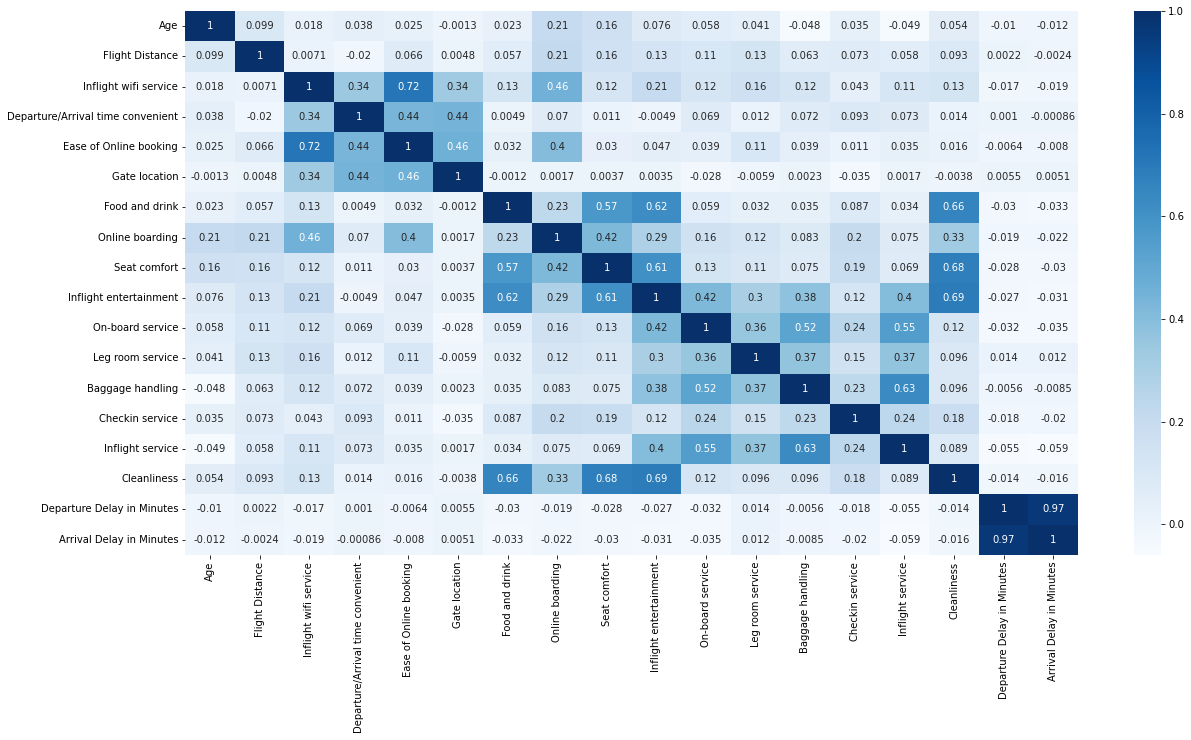

In [3]:
#Bước 3:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
#Bước 4:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')


In [4]:
#Bước 5:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)
#Bước 6:
X = df[df.columns[6:20]]
#Bước 7:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
kmo_all, kmo_model = calculate_kmo(X)
kmo_model

chi_square_value, sig = calculate_bartlett_sphericity(X)
print('Chi square value: ', chi_square_value)
print('Sig: ', sig)

Chi square value:  601690.8930479751
Sig:  0.0


Factor scores: 
[[ 1.36260979  0.82931788  0.23423872]
 [-1.91321535 -0.75444017 -0.07044692]
 [ 1.38392162  0.52034372 -0.56366525]
 ...
 [ 0.52230389  0.35290997 -1.13228685]
 [-2.03649106 -0.68399078 -1.24649115]
 [-1.99790947 -1.02817617 -0.20622249]]
Eigenvalues: 
[3.80011677 2.36198598 2.16589224 1.06327401 0.95093123 0.7003355
 0.53995637 0.51465504 0.46947475 0.36866001 0.32840792 0.29509562
 0.25317089 0.18804368]


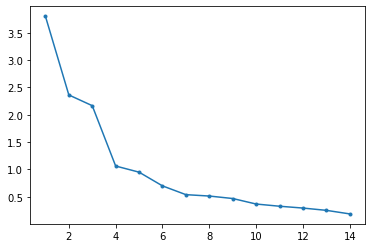

In [10]:
fa = FactorAnalyzer()
fa.fit(X)

scores = fa.transform(X.values)
print("Factor scores: ")
print(scores)
#Bước 8:
ev, v = fa.get_eigenvalues()
print("Eigenvalues: ")
print(ev)
plt.plot(range(1, X.shape[1] + 1), ev , marker='.')


[[ 0.18723697  0.8018007   0.12674886]
 [-0.05750598  0.66653179  0.06286198]
 [ 0.04459196  0.88643053  0.02429175]
 [-0.0588654   0.6714282  -0.0551079 ]
 [ 0.82739943 -0.0094005  -0.01582759]
 [ 0.48529266  0.4073011   0.10833747]
 [ 0.84861009  0.01596827  0.06816856]
 [ 0.7598142   0.00209621  0.45376581]
 [ 0.08944956  0.02065923  0.78232736]
 [ 0.05846441  0.07782171  0.61048713]
 [ 0.01570089  0.02416412  0.82117617]
 [ 0.16571832  0.02327215  0.37796308]
 [ 0.01463584  0.01568436  0.83704738]
 [ 0.87988879 -0.01051349  0.07997773]]


<AxesSubplot:>

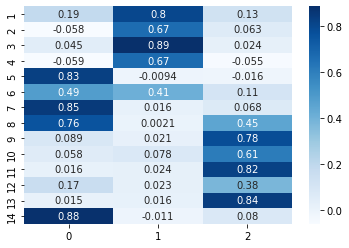

In [11]:
#Bước 9: Tính Loadings
fa = FactorAnalyzer(3, rotation='varimax', method='principal')
fa.fit(X)
loads = fa.loadings_
print(loads)

ylabels = []
for i in range(1, 15):
    ylabels.append(i)

sns.heatmap(loads, annot=True, cmap='Blues', yticklabels=ylabels)

In [7]:
columns = []
for col in X.columns:
    columns.append(col)
    
vars_of_factor1 = []
vars_of_factor2 = []
vars_of_factor3 = []

i1 = np.where(loads[:, 0] >= 0.5)[0]
for i in i1:
    vars_of_factor1.append(columns[i])
print('Variables of factor 1:', vars_of_factor1)

i2 = np.where(loads[:, 1] >= 0.5)[0]
for i in i2:
    vars_of_factor2.append(columns[i])
print('Variables of factor 2:', vars_of_factor2)

i3 = np.where(loads[:, 2] >= 0.5)[0]
for i in i3:
    vars_of_factor3.append(columns[i])
print('Variables of factor 3:', vars_of_factor3)

Variables of factor 1: ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']
Variables of factor 2: ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']
Variables of factor 3: ['On-board service', 'Leg room service', 'Baggage handling', 'Inflight service']


In [12]:
#Bước 11(Kiểm tra lại):
f1 = X[vars_of_factor1]
f2 = X[vars_of_factor2]
f3 = X[vars_of_factor3]

f1_alpha = pg.cronbach_alpha(f1)
f2_alpha = pg.cronbach_alpha(f2)
f3_alpha = pg.cronbach_alpha(f3)

print('Factor 1 alpha: ', f1_alpha[0])
print('Factor 2 alpha: ', f2_alpha[0])
print('Factor 3 alpha: ', f3_alpha[0])

Factor 1 alpha:  0.8762877916624101
Factor 2 alpha:  0.7679754211110685
Factor 3 alpha:  0.7722005980212817
